## Komodo Energy Coding Challenge

In [23]:
# Find out what versions of packages I have installed in my venv
#pip list

In [27]:
import numpy as np #numpy==1.24.3
import pandas as pd #pandas==2.0.3
import matplotlib.pyplot as plt #matplotlib==3.7.2
import sklearn as sl #sklearn == 1.3.0


# Data Exploration

## Household usage

In [58]:
# Read in the household usage data
energy = pd.read_csv('household_usage.csv')
energy = energy[['Time', 'Standard_Household', 'HeatPump_Household', 'HeatPump_Battery_Household']]
energy

,Time,Standard_Household,HeatPump_Household,HeatPump_Battery_Household
0,00:00,0.4,0.6,0.6
1,00:30,0.3,0.5,0.5
2,01:00,0.3,0.5,0.5
3,01:30,0.3,0.5,0.5
4,02:00,0.2,0.4,0.5
5,02:30,0.2,0.4,5.0
6,03:00,0.2,0.4,5.0
7,03:30,0.2,0.4,5.0
8,04:00,0.2,0.4,0.0
9,04:30,0.2,0.4,0.0


<Axes: xlabel='Time'>

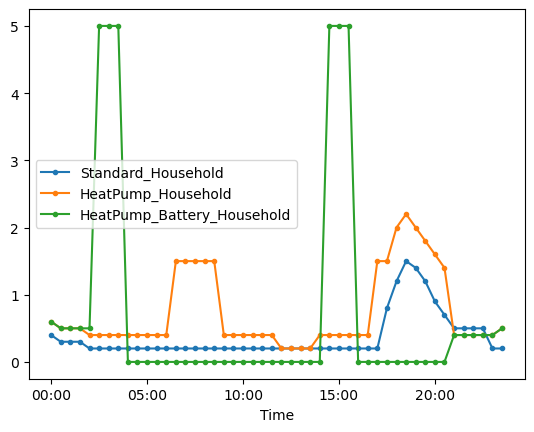

In [80]:
# Plot
energy.set_index('Time').plot(style='.-')

In [84]:
# Get some useful stats
energy.set_index('Time').describe()

,Standard_Household,HeatPump_Household,HeatPump_Battery_Household
count,48.000000,48.000000,48.000000
mean,0.366667,0.735417,0.731250
std,0.336650,0.584731,1.642152
min,0.200000,0.200000,0.000000
25%,0.200000,0.400000,0.000000
50%,0.200000,0.400000,0.000000
75%,0.325000,1.425000,0.425000
max,1.500000,2.200000,5.000000


In [122]:
# Find the time when the energy consumption is the max
e = energy.set_index('Time')
e[e==e.max()].dropna(how='all')

,Standard_Household,HeatPump_Household,HeatPump_Battery_Household
Time,,,
02:30,NaN,NaN,5.0
03:00,NaN,NaN,5.0
03:30,NaN,NaN,5.0
14:30,NaN,NaN,5.0
15:00,NaN,NaN,5.0
15:30,NaN,NaN,5.0
18:30,1.5,2.2,NaN


In [126]:
# Find the time when the energy consumption is the minimum
energy.set_index('Time').idxmin()


Standard_Household            02:00
HeatPump_Household            12:00
HeatPump_Battery_Household    04:00
dtype: object

In [96]:
# Find the daily energy usage
energy.set_index('Time').sum()


Standard_Household            17.6
HeatPump_Household            35.3
HeatPump_Battery_Household    35.1
dtype: float64

In [82]:
# The standard household represents a typical UK home where the consumption is mainly in the evening.
# The household are likely out during the day at work and return at 5.30pm.
# There is a base load of 0.2kWh and a peak load of 1.5kWh at 18:30-19:00

In [ ]:
# The Heat pump household has large peaks in the morning and the evening.
# This is presumably when the heating/hot water are on.
# The consumption is approximately double the standard household

In [ ]:
# The Heat Pump battery household has a similar consuption to the heat pump household but the times of usage are different.
# The battery is charged overight and early afternoon (presumably when the tariff is cheaper - check in the next section).
# Usage is zero for most of the day until 20:30 when the charge in the battery runs out

In [ ]:
# No missing data seen. Data is for a single day.